<a href="https://colab.research.google.com/github/iqrasarwar/ComputerVision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow
import keras

In [92]:
images = []
labels = []

In [93]:
dataset_path = '/content/drive/MyDrive/ComputerVisionCoLabFiles/CNN/train/'
folders = os.listdir(dataset_path)
folders

['sad', 'angry', 'neutral', 'disgust', 'fear', 'surprise', 'happy']

In [94]:
name_mapping_dict = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'neutral':4, 'sad':5, 'surprise':6}
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}
print(inv_name_mapping_dict)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [95]:
img_size = 64

In [96]:
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')
  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: sad
Processing folder: angry
Processing folder: neutral
Processing folder: disgust
Processing folder: fear
Processing folder: surprise
Processing folder: happy


In [111]:
images = np.expand_dims(images, axis=3)
images = np.array(images)
labels = np.array(labels)

In [112]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (28847, 64, 64, 1)
labels shape :  (28847,)


TypeError: ignored

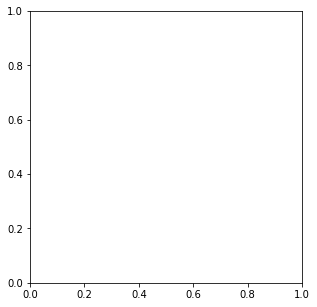

In [119]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [102]:
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [103]:
images = np.array(images) / 255

In [104]:
labels_one_hot = to_categorical(labels)

In [105]:
labels[303]

5

In [106]:
labels_one_hot[303]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [107]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.10, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (25962, 64, 64) (25962, 7)
Testing data shape :  (2885, 64, 64) (2885, 7)


In [109]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))

ValueError: ignored

In [ ]:
model.compile(optimizer='adam', loss= tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [87]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=15, verbose=1, 
                   validation_data=(test_images, test_labels))

Epoch 1/15


ValueError: ignored